In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optimistix as optx

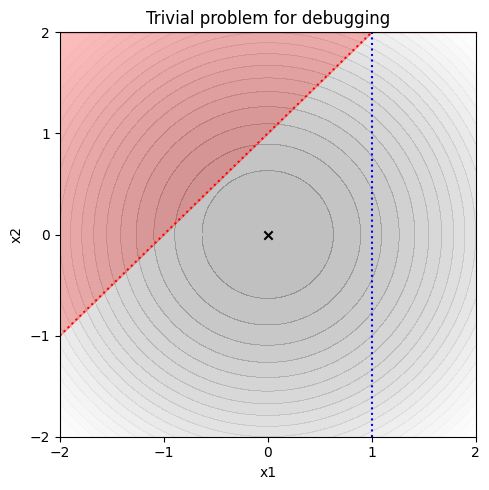

In [2]:
def f(y, args):
    del args
    x1, x2 = y
    return x1**2 + x2**2


def _wrapped_f(y):
    return f(y, None)


# TODO: we don't currently support not having equality constraints!
def g(y):  # Linear equality constraint
    x1, x2 = y
    return x1 + 1, x1 + 1 - x2


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

limits = (-2, 2)
x = jnp.linspace(*limits, 100)
y = jnp.linspace(*limits, 100)
X, Y = jnp.meshgrid(x, y)
Z = _wrapped_f((X, Y))
ax.contourf(X, Y, Z, levels=20, alpha=0.25, cmap="Grays_r")

ax.plot([-2, 2], [-1, 3], "r:", label="constraint")
ax.fill_between(x, x + 1, 2, color="red", alpha=0.25)
ax.scatter(0, 0, c="k", marker="x", label="solution")
ax.axvline(1, color="blue", linestyle=":")

ax.set_xlim(limits)
ax.set_ylim(limits)
ticks = [i for i in range(-2, 3)]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.set_title("Trivial problem for debugging")
fig.tight_layout()

In [3]:
solver = optx.IPOPTLike(rtol=1e-3, atol=1e-6)

y0 = jnp.array([1.0, 3.0])

solution = optx.minimise(f, solver, y0, constraint=g, max_steps=10, throw=False)

solution.value


iterate: (Array([1., 3.], dtype=float32), (Array(1., dtype=float32), Array(-1., dtype=float32)), (Array([0., 0.], dtype=float32), Array([0., 0.], dtype=float32)))
accepted step
lower error: [0. 0.]
upper error: [0. 0.]
constraint norm: 2.0
optimality error: 6.0
Termination: False
Termination w/ first step: False
iterate_step: (Array([-1.9999993, -3.       ], dtype=float32), (Array(0.99999964, dtype=float32), Array(-1., dtype=float32)), (Array([0., 0.], dtype=float32), Array([0., 0.], dtype=float32)))

iterate: (Array([-0.9999993,  0.       ], dtype=float32), (Array(1.9999996, dtype=float32), Array(-2., dtype=float32)), (Array([0., 0.], dtype=float32), Array([0., 0.], dtype=float32)))
accepted step
lower error: [0. 0.]
upper error: [0. 0.]
constraint norm: 7.152557373046875e-07
optimality error: 1.0728836059570312e-06
Termination: False
Termination w/ first step: False
iterate_step: (Array([-7.152555e-07,  0.000000e+00], dtype=float32), (Array(3.576278e-07, dtype=float32), Array(7.1525

Array([-1.,  0.], dtype=float32)

With a single linear equality constraint, we immediately get the correct solution.